In [34]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:

from transformers import BertTokenizer
from transformers import BertModel, BertConfig, BertForTokenClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.layers import Input, Dropout, Dense


ImportError: cannot import name 'BertModel' from 'transformers' (c:\Users\USER\anaconda3\Lib\site-packages\transformers\__init__.py)

In [6]:
data = pd.read_csv('FinalDataF.csv', encoding='latin-1')

In [7]:
data

Title  \
0    A CASE STUDY OF DRIVER'S LICENSE PROCESSES ON ...   
1      A CASE STUDY ON POULTRY EGG PRODUCTION BUSINESS   
2    DESIGN AND DEVELOPMENT OF A FIRE DETECTION AND...   
3    A KNOWLEDGE-BASED SYSTEM N MATCHING TREE, PLAN...   
4    DESIGN AND DEVELOPMENT OF MEMORANDUM PRIORITIZ...   
..                                                 ...   
375                                                NaN   
376                                                NaN   
377                                                NaN   
378                                                NaN   
379                                                NaN   

                                              Abstract  
0    A Case Study on Driver's License Processes was...  
1    A Case Study on Poultry Egg Production Busines...  
2    A fire detection and alarm system prototype ba...  
3    A Knowledge-Based System on Matching of Tree, ...  
4    A memorandum is a means of inter-office corres...  
..                                                 ...  
375                                                NaN  
376                                                NaN  
377                                                NaN  
378                                                NaN  
379                                                NaN  

[380 rows x 2 columns]

In [13]:
X = data[['Title', 'Abstract']]

In [18]:
missing_values = data[['Title', 'Abstract']].isna().sum()
print(missing_values)


Title       54
Abstract    54
dtype: int64


In [19]:
data['Title'].fillna('', inplace=True)
data['Abstract'].fillna('', inplace=True)


In [20]:
data['Title'] = data['Title'].str.lower()
data['Abstract'] = data['Abstract'].str.lower()


In [21]:


tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Title'] + ' ' + data['Abstract'])


In [23]:
linkage_matrix = linkage(X.toarray(), method='ward')

{'icoord': [[525.0, 525.0, 535.0, 535.0],
  [515.0, 515.0, 530.0, 530.0],
  [505.0, 505.0, 522.5, 522.5],
  [495.0, 495.0, 513.75, 513.75],
  [485.0, 485.0, 504.375, 504.375],
  [475.0, 475.0, 494.6875, 494.6875],
  [465.0, 465.0, 484.84375, 484.84375],
  [455.0, 455.0, 474.921875, 474.921875],
  [445.0, 445.0, 464.9609375, 464.9609375],
  [435.0, 435.0, 454.98046875, 454.98046875],
  [425.0, 425.0, 444.990234375, 444.990234375],
  [415.0, 415.0, 434.9951171875, 434.9951171875],
  [405.0, 405.0, 424.99755859375, 424.99755859375],
  [395.0, 395.0, 414.998779296875, 414.998779296875],
  [385.0, 385.0, 404.9993896484375, 404.9993896484375],
  [375.0, 375.0, 394.99969482421875, 394.99969482421875],
  [365.0, 365.0, 384.9998474121094, 384.9998474121094],
  [355.0, 355.0, 374.9999237060547, 374.9999237060547],
  [345.0, 345.0, 364.99996185302734, 364.99996185302734],
  [335.0, 335.0, 354.9999809265137, 354.9999809265137],
  [325.0, 325.0, 344.99999046325684, 344.99999046325684],
  [315.0, 31

c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


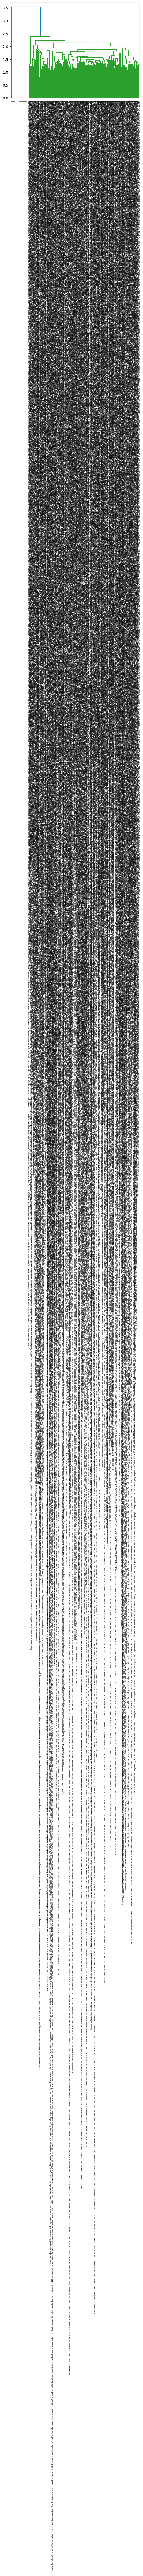

In [29]:
# Concatenate the 'Title' and 'Abstract' columns with a separator
data['Combined_Labels'] = data['Title'] + ' - ' + data['Abstract']

# Convert the combined labels to a list
labels = data['Combined_Labels'].tolist()

# Create the dendrogram with the combined labels
dendrogram(linkage_matrix, labels=labels)



In [30]:
plt.show()

In [31]:
from scipy.cluster.hierarchy import fcluster

cut_off = 2
cluster_labels = fcluster(linkage_matrix, cut_off, criterion='distance')

In [32]:
print(cluster_labels)

[7 7 7 7 7 7 7 7 3 5 7 7 5 7 6 7 7 8 7 6 7 7 6 7 7 6 7 7 4 4 6 7 7 7 7 7 7
 6 7 4 4 6 7 7 7 5 7 8 6 8 7 7 7 7 6 7 7 7 7 7 7 7 7 8 7 7 6 7 7 7 2 2 2 7
 7 6 6 7 8 7 3 3 7 8 7 7 7 8 7 7 6 8 8 7 7 7 7 7 6 6 6 3 5 7 7 7 7 6 6 6 4
 7 6 6 8 8 6 7 4 8 8 4 5 7 7 7 6 7 8 7 8 5 5 7 6 7 6 4 7 7 7 5 7 4 7 7 8 7
 4 4 7 5 5 7 6 7 7 7 7 7 3 8 7 8 8 7 7 6 8 7 7 4 7 3 3 6 6 8 8 7 7 8 7 7 7
 7 3 7 7 7 7 6 4 7 7 8 7 5 4 8 7 6 4 8 5 2 7 8 7 8 8 8 8 8 7 7 6 7 8 8 8 8
 4 8 7 6 6 6 7 7 6 6 6 5 4 4 7 7 8 7 6 7 6 6 4 2 7 2 7 4 7 2 7 7 7 7 3 3 7
 8 4 4 7 4 3 6 7 3 7 6 7 8 7 8 5 7 8 7 7 7 7 8 7 7 7 7 7 7 7 7 8 7 8 6 7 7
 7 4 7 5 4 6 8 7 8 2 2 6 8 8 6 7 7 7 6 7 8 7 6 7 4 4 6 3 8 7 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
